In [1]:
import DataAnalysis as da
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

### Trial 1 - Load in Data for Peak Wavelength vs Photocurrent, Convert units, Propagate Error in Wavelength

In [2]:
wavelength = np.array([510, 480, 450, 520, 530, 550, 575, 565, 540, 585, 600]) #nanometers
w_err = 7e-9 #meters
wavelength_m = np.array([(1e-9)*i for i in wavelength]) #wavelength in meters

wavelength_with_error = da.get_uncertain_array(wavelength_m, w_err) #propagate error

photocurrent_nA = np.array([43, 29, 14, 40, 32, 18, 3, 7, 32, 3, 0]) #nanoamps
photocurrent = np.array([(1e-9)*i for i in photocurrent_nA]) #Amps
p_err = 4e-9 #Amps, #Error in photocurrent as observed in lab

def frequency(w):
    "Function for converting wavelengths to frequencies"
    return (3*(1e8))/w

freq_with_error = np.array([frequency(i) for i in wavelength_with_error]) #frequency data with error as single object

#Divide frequency array into separate frequency and error objects
freq = da.seperate_uncertainty_array(freq_with_error) #Hertz

### Plot of frequency vs. photocurrent

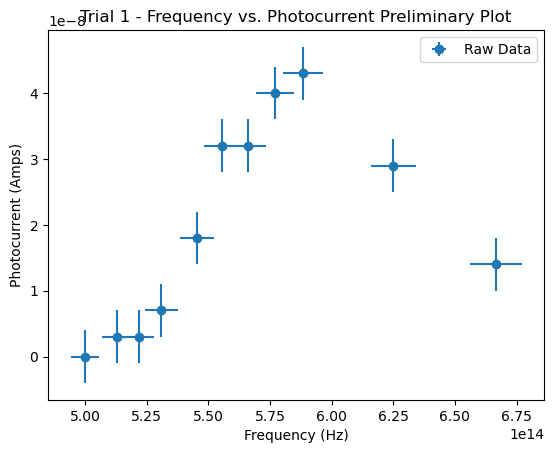

In [3]:
plt.figure()
plt.title("Trial 1 - Frequency vs. Photocurrent Preliminary Plot")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Photocurrent (Amps)")
plt.errorbar(x=freq[0], y=photocurrent, xerr=freq[1], yerr=p_err, fmt="o", label="Raw Data")
plt.legend()

### Weighted Fit for data

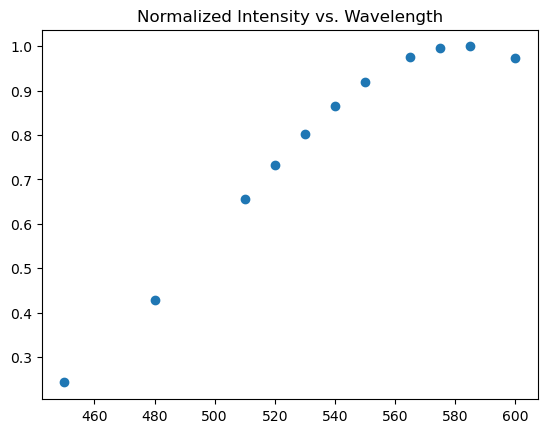

Text(0.5, 1.0, 'Corrected Photocurrent vs. Wavelength')

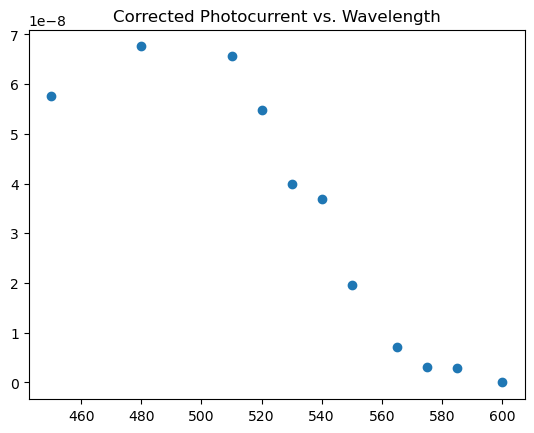

In [4]:
##use linear fit, then analyze fit after normalizing with garima's model.

# Gaussian function parameters
a = 0.99986202
b = 582.10369295
c = 78.50226907

def gaussian(x, a, b, c):
    
    return a*np.exp((-1*(x-b)**2)/(2*c**2))

# Convert frequency to wavelength in nm

x = (3e8/np.array(freq[0]))*1e9
norm_inten = gaussian(x, a, b, c) # normalized intensity model

plt.scatter(x, norm_inten)
plt.title("Normalized Intensity vs. Wavelength")
plt.show()

# Now divide the photocurrent by this
corrpc = photocurrent/norm_inten
plt.errorbar(x=x, y=corrpc, fmt="o", label="Raw Data")
plt.title("Corrected Photocurrent vs. Wavelength")

### Trial 2 Stopping Frequency

In [7]:
wavelength_2 = np.array([590, 585, 565, 550, 530, 510, 495, 475, 473, 603, 443]) #nanometers
w_err_2 = 7e-9 #meters
wavelength_m_2 = np.array([(1e-9)*i for i in wavelength_2]) #wavelength in meters

wavelength_with_error_2 = da.get_uncertain_array(wavelength_m_2, w_err_2) #propagate error

photocurrent_nA_2 = np.array([3, 7, 10, 18, 21, 25, 14, 10, 3, 0, 0]) #nanoamps
photocurrent_2 = np.array([(1e-9)*i for i in photocurrent_nA_2]) #Amps
p_err_2 = 4e-9 #Amps, #Error in photocurrent as observed in lab

def frequency(w):
    "Function for converting wavelengths to frequencies"
    return (3*(1e8))/w

freq_with_error_2 = np.array([frequency(i) for i in wavelength_with_error_2]) #frequency data with error as single object

#Divide frequency array into separate frequency and error objects
freq_2 = da.seperate_uncertainty_array(freq_with_error_2) #Hertz
print(photocurrent_nA_2)

[ 3  7 10 18 21 25 14 10  3  0  0]


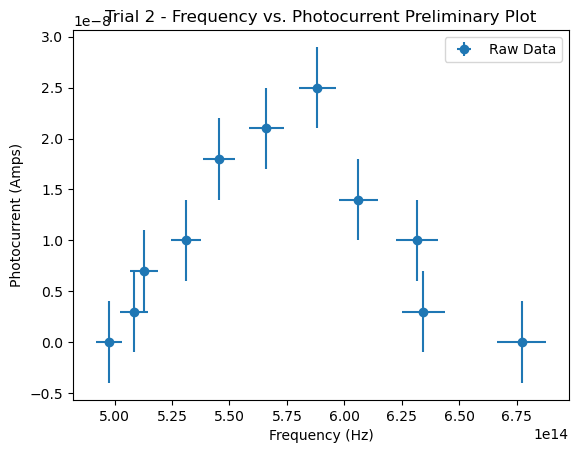

In [8]:
plt.figure()
plt.title("Trial 2 - Frequency vs. Photocurrent Preliminary Plot")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Photocurrent (Amps)")
plt.errorbar(x=freq_2[0], y=photocurrent_2, xerr=freq_2[1], yerr=p_err_2, fmt="o", label="Raw Data")
plt.legend()